In [2]:
library(ggplot2)
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 3.2.5”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
data <- read.csv("../../../io/data/train.csv")

In [6]:
df <- data %>%
    arrange(secs)

In [7]:
names(df)

[1] "s.barometer"           "s.co2"                 "s.humidity"           
 [4] "s.no2resistance"       "s.o3resistance"        "s.temperature.ambient"
 [7] "s.temperature.unit"    "secs"                  "O3_Waarden"           
[10] "NO2_Waarden"           "CO_Waarden"

# General

In [15]:
summary(df)
dim(df)

  s.barometer         s.co2        s.humidity     s.no2resistance 
 Min.   : 973.7   Min.   :   0   Min.   : 11.06   Min.   :   0.0  
 1st Qu.:1004.6   1st Qu.: 961   1st Qu.: 59.57   1st Qu.: 530.1  
 Median :1009.0   Median :1006   Median : 69.74   Median : 737.7  
 Mean   :1009.6   Mean   :1009   Mean   : 68.74   Mean   : 785.8  
 3rd Qu.:1014.7   3rd Qu.:1125   3rd Qu.: 78.13   3rd Qu.: 964.7  
 Max.   :1031.9   Max.   :6382   Max.   :124.47   Max.   :1934.0  
                                                                  
 s.o3resistance    s.temperature.ambient s.temperature.unit      secs          
 Min.   :   0.00   Min.   :-4.187        Min.   : 0.312     Min.   :1.455e+09  
 1st Qu.:  37.10   1st Qu.: 5.625        1st Qu.:19.250     1st Qu.:1.463e+09  
 Median :  62.73   Median :11.937        Median :26.125     Median :1.467e+09  
 Mean   :  84.44   Mean   :11.749        Mean   :25.799     Mean   :5.581e+09  
 3rd Qu.: 115.53   3rd Qu.:16.687        3rd Qu.:31.562     3rd 

[1] 542679     11

# Barometer

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


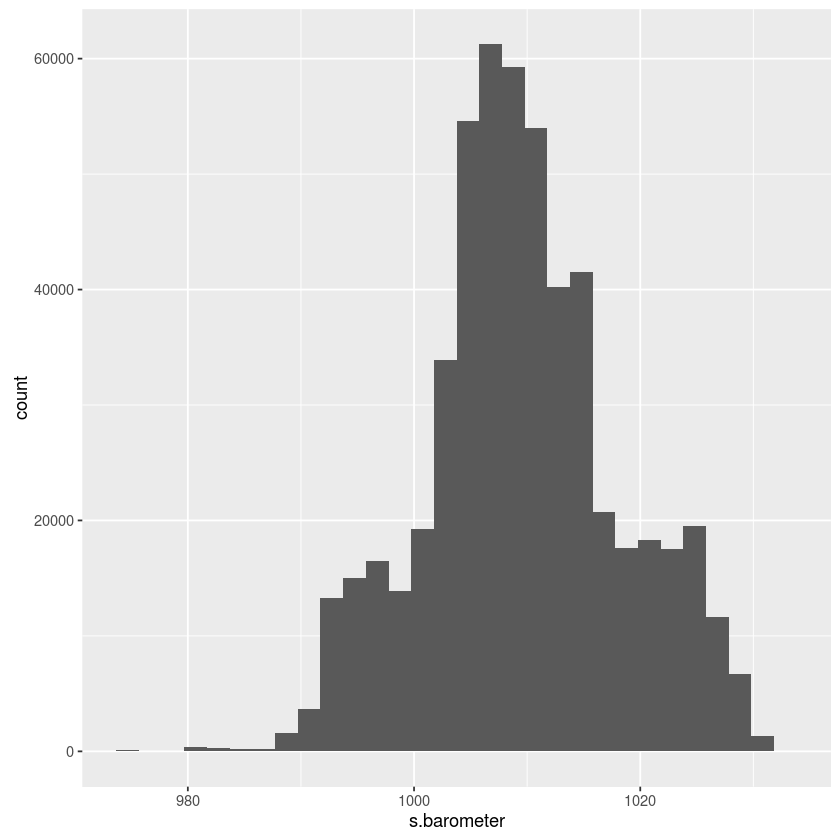

In [8]:
ggplot(df, aes(s.barometer)) + 
geom_histogram()

# CO2

# Humidity

# NO2

# O3

# Temperature ambient

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -4.187   5.625  11.940  11.750  16.690  43.880 

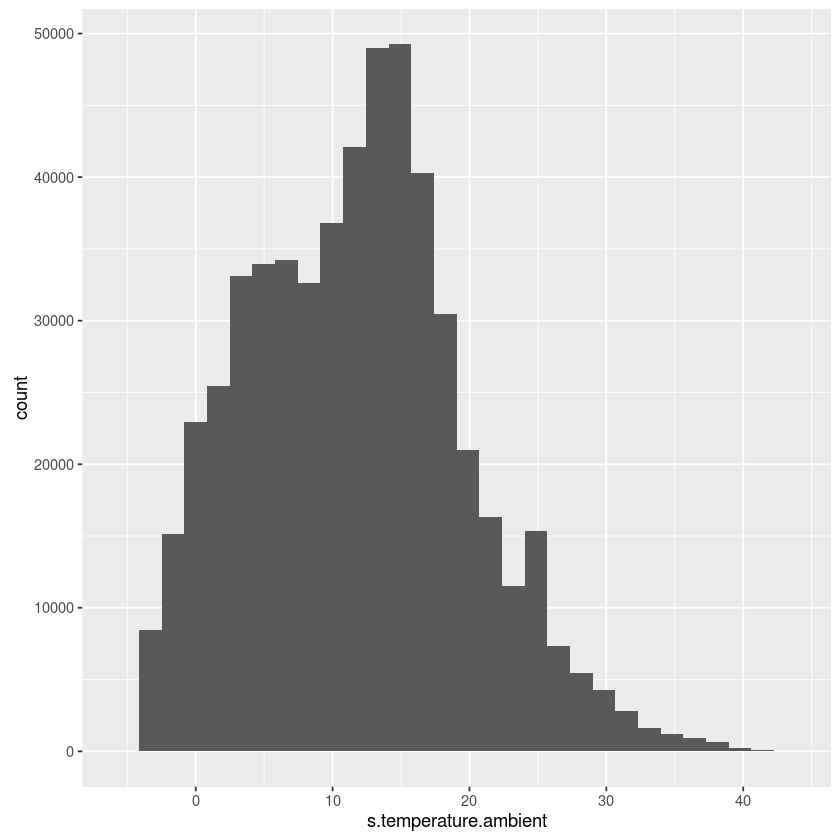

In [12]:
ggplot(df, aes(s.temperature.ambient)) + 
geom_histogram()
summary(df$s.temperature.ambient)

# Temperature unit